In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [3]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)
    
    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [7]:
URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

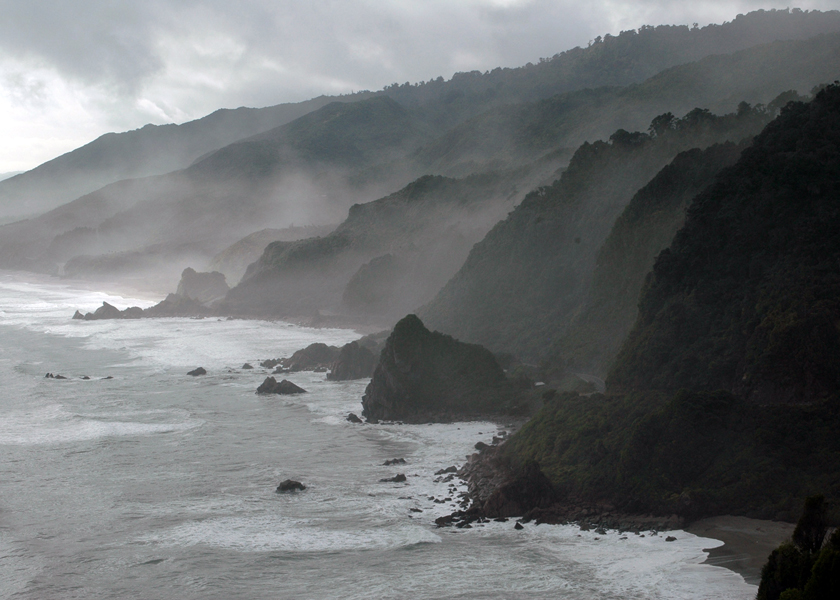

In [9]:
img_bgr = cv2.imread('New_Zealand_Coast.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

Image(filename='New_Zealand_Coast.jpg')

# Adjust Brightness

Text(0.5, 1.0, 'Brighter')

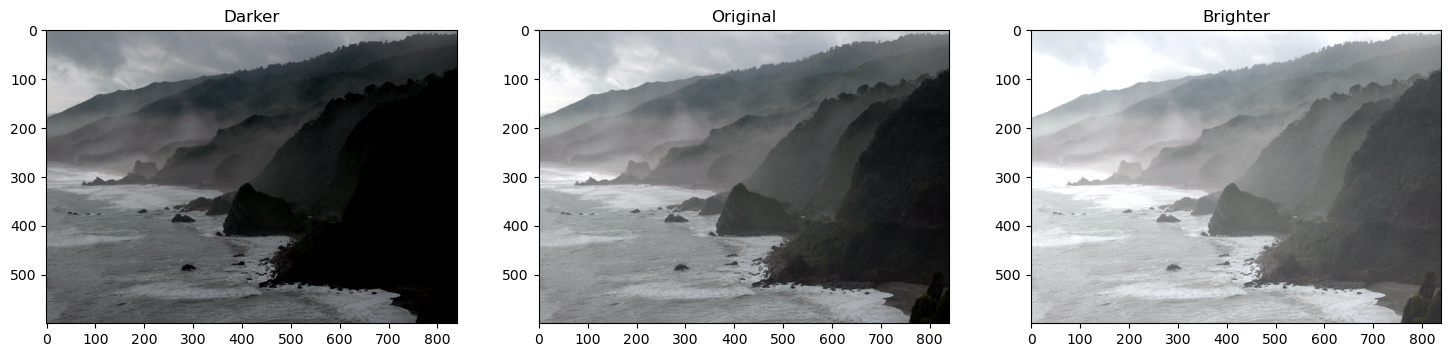

In [11]:
matrix = np.ones(img_bgr.shape, dtype='uint8') * 50

img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker = cv2.subtract(img_rgb, matrix)

# show images
plt.figure(figsize=[18,5])
plt.subplot(131);plt.imshow(img_rgb_darker); plt.title('Darker')
plt.subplot(132);plt.imshow(img_rgb); plt.title('Original')
plt.subplot(133);plt.imshow(img_rgb_brighter); plt.title('Brighter')

# Adjust Contrast

Text(0.5, 1.0, 'Brighter')

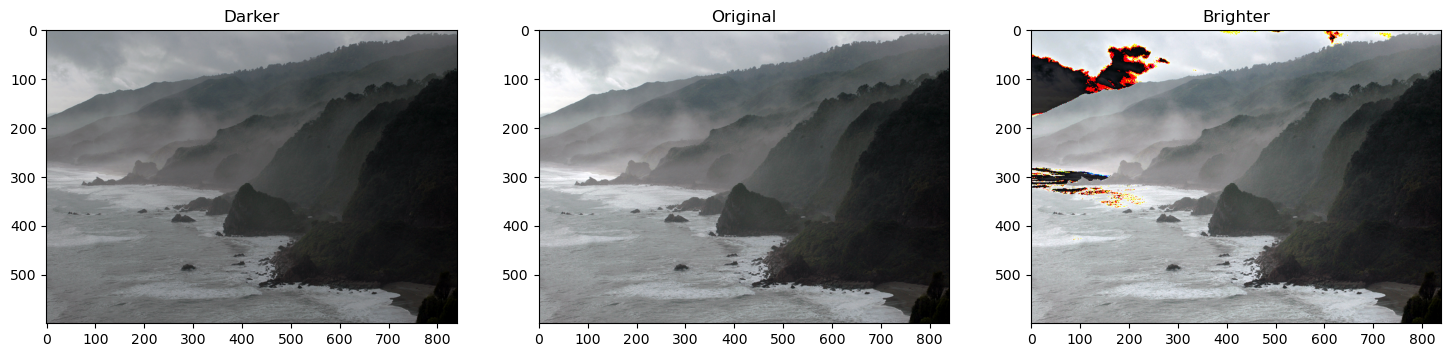

In [12]:
matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb), matrix2))

# show images
plt.figure(figsize=[18,5])
plt.subplot(131);plt.imshow(img_rgb_darker); plt.title('Darker')
plt.subplot(132);plt.imshow(img_rgb); plt.title('Original')
plt.subplot(133);plt.imshow(img_rgb_brighter); plt.title('Brighter')

## Handling overflow using np.clip

Text(0.5, 1.0, 'Brighter')

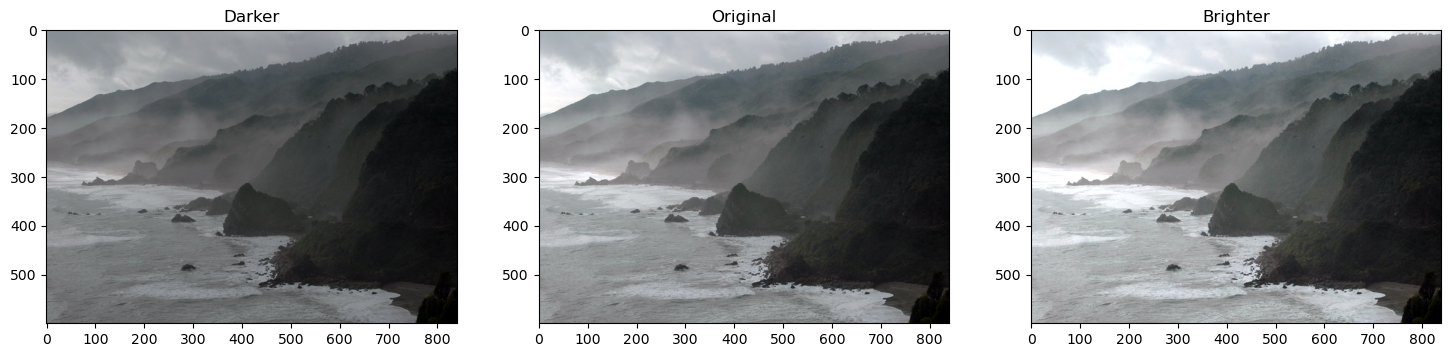

In [13]:
matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_lower = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_higher = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix2), 0, 255))

# show images
plt.figure(figsize=[18,5])
plt.subplot(131);plt.imshow(img_rgb_lower); plt.title('Darker')
plt.subplot(132);plt.imshow(img_rgb); plt.title('Original')
plt.subplot(133);plt.imshow(img_rgb_higher); plt.title('Brighter')

# Image Threshold

Text(0.5, 1.0, 'Threshold')

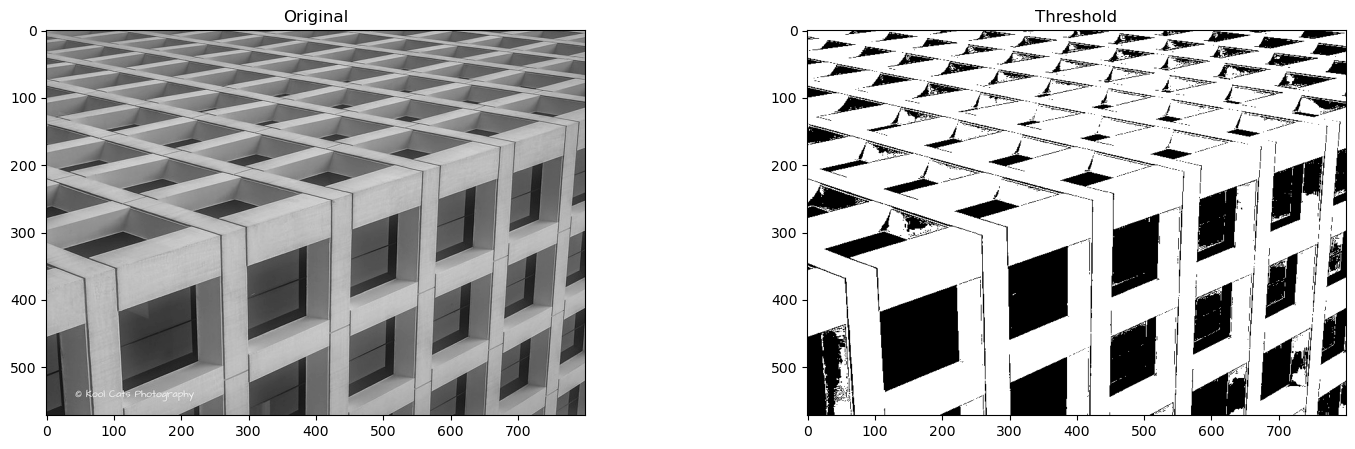

In [14]:
img_read = cv2.imread('building-windows.jpg', cv2.IMREAD_GRAYSCALE)
retval, image_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)

# show images
plt.figure(figsize=[18,5])
plt.subplot(121);plt.imshow(img_read, cmap='gray'); plt.title('Original')
plt.subplot(122);plt.imshow(image_thresh, cmap='gray'); plt.title('Threshold')

### Application: Music Sheet Reader

Text(0.5, 1.0, 'Adaptive')

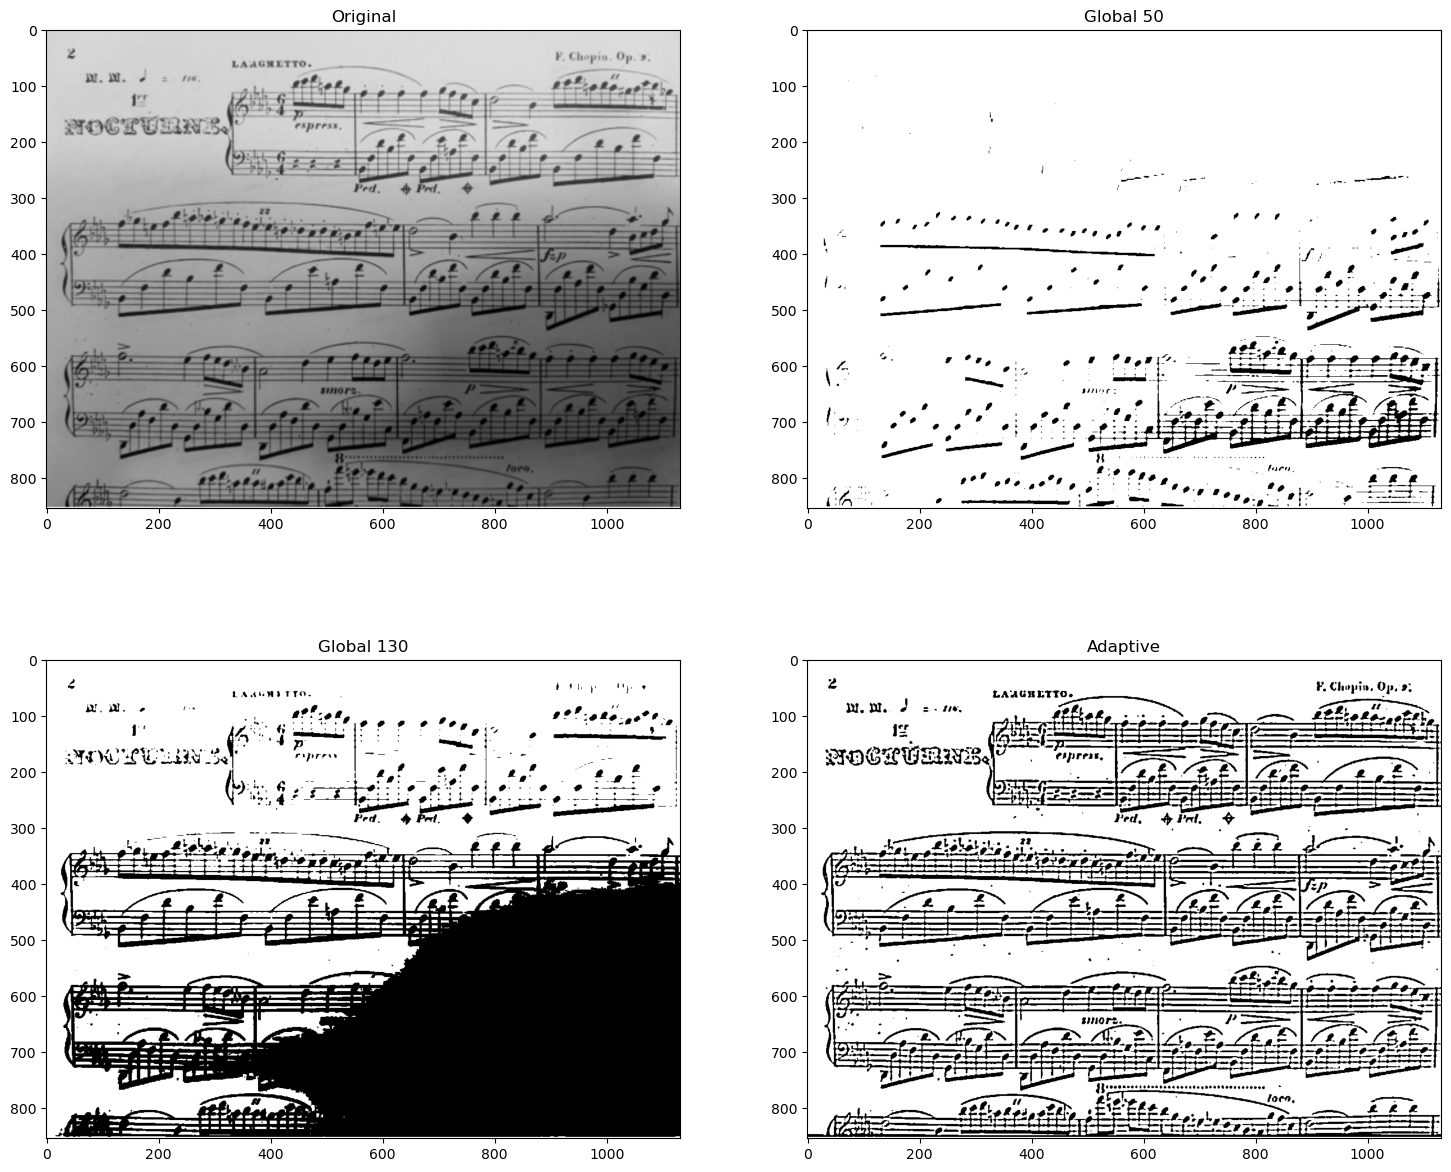

In [16]:
img_read = cv2.imread('Piano_Sheet_Music.png', cv2.IMREAD_GRAYSCALE)

# global threshold
retval, img_thresh_gbl_1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)

# global threshold
retval, img_thresh_gbl_2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

# adaptive threshold
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

plt.figure(figsize=[18,15])
plt.subplot(221);plt.imshow(img_read, cmap='gray'); plt.title('Original')
plt.subplot(222);plt.imshow(img_thresh_gbl_1, cmap='gray'); plt.title('Global 50')
plt.subplot(223);plt.imshow(img_thresh_gbl_2, cmap='gray'); plt.title('Global 130')
plt.subplot(224);plt.imshow(img_thresh_adp, cmap='gray'); plt.title('Adaptive')